酶活性预测实战 task:
1、基于 T-R-train.csv 数据，建立线性回归模型，计算其在 T-R-test.csv 数据上的 r2 分数，可视化模型预测结果;
2、加入多项式特征（2次、5次），建立回归模型;
3、计算多项式回归模型对测试数据进行预测的 r2 分数，判断哪个模型更准确;
4、可视化多项式回归模型数据预测结果，判断哪个模型预测更准确

In [1]:
# load the data
import pandas as pd
import numpy as np
data_train = pd.read_csv('T-R-train.csv')
print(data_train)

        T  rate
0   46.53  2.49
1   48.14  2.56
2   50.15  2.63
3   51.36  2.69
4   52.57  2.74
5   54.18  2.80
6   56.19  2.88
7   58.58  2.92
8   61.37  2.96
9   63.34  2.95
10  65.31  2.91
11  66.47  2.85
12  68.03  2.78
13  69.97  2.69
14  71.13  2.61
15  71.89  2.54
16  73.05  2.45
17  74.21  2.39


In [3]:
# define X_train and y_train
X_train = data_train.loc[:, 'T']
y_train = data_train.loc[:, 'rate']
y_train.head()

0    2.49
1    2.56
2    2.63
3    2.69
4    2.74
Name: rate, dtype: float64

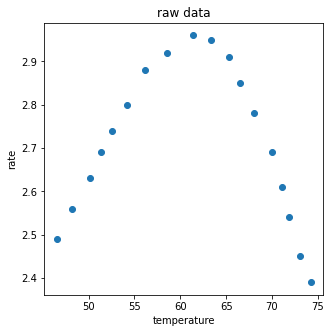

In [5]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [7]:
X_train = np.array(X_train).reshape(-1, 1)

In [8]:
# linear regression model prediction
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [10]:
# load the test data
data_test = pd.read_csv('T-R-test.csv')
X_test = data_test.loc[:, 'T']
y_test = data_test.loc[:, 'rate']

In [11]:
X_test = np.array(X_test).reshape(-1, 1)

In [13]:
# make prediction on the training and testing data
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print('training r2:', r2_train)
print('test r2:', r2_test)

training r2: 0.016665703886981964
test r2: -0.758336343735132


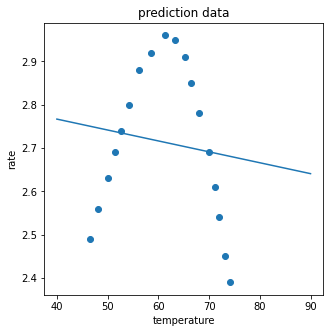

In [16]:
# generate new data
X_range = np.linspace(40, 90, 300).reshape(-1, 1)
y_range_predict = lr1.predict(X_range)
fig2 = plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train)
plt.plot(X_range, y_range_predict)
plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [24]:
# 多项式模型
# generate new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)
poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)
print(X_5_train)

[[1.00000000e+00 4.65300000e+01 2.16504090e+03 1.00739353e+05
  4.68740210e+06 2.18104820e+08]
 [1.00000000e+00 4.81400000e+01 2.31745960e+03 1.11562505e+05
  5.37061900e+06 2.58541599e+08]
 [1.00000000e+00 5.01500000e+01 2.51502250e+03 1.26128378e+05
  6.32533818e+06 3.17215710e+08]
 [1.00000000e+00 5.13600000e+01 2.63784960e+03 1.35479955e+05
  6.95825051e+06 3.57375746e+08]
 [1.00000000e+00 5.25700000e+01 2.76360490e+03 1.45282710e+05
  7.63751204e+06 4.01504008e+08]
 [1.00000000e+00 5.41800000e+01 2.93547240e+03 1.59043895e+05
  8.61699821e+06 4.66868963e+08]
 [1.00000000e+00 5.61900000e+01 3.15731610e+03 1.77409592e+05
  9.96864496e+06 5.60138160e+08]
 [1.00000000e+00 5.85800000e+01 3.43161640e+03 2.01024089e+05
  1.17759911e+07 6.89837560e+08]
 [1.00000000e+00 6.13700000e+01 3.76627690e+03 2.31136413e+05
  1.41848417e+07 8.70523734e+08]
 [1.00000000e+00 6.33400000e+01 4.01195560e+03 2.54117268e+05
  1.60957877e+07 1.01950720e+09]
 [1.00000000e+00 6.53100000e+01 4.26539610e+03 2.7

In [18]:
lr2 = LinearRegression()
lr2.fit(X_2_train, y_train)
y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train, y_2_train_predict)
r2_2_test = r2_score(y_test, y_2_test_predict)
print('training r2_2:', r2_2_train)
print('test r2_2:', r2_2_test)

training r2_2: 0.9700515400689422
test r2_2: 0.9963954556468684


In [19]:
X_2_range = np.linspace(40, 90, 300).reshape(-1, 1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predict = lr2.predict(X_2_range)

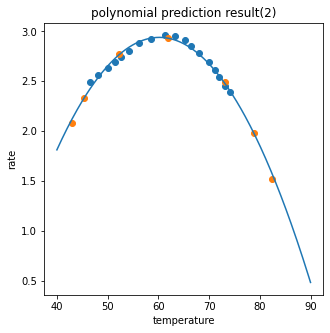

In [23]:
fig3 = plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_range, y_2_range_predict)
plt.title('polynomial prediction result(2)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [25]:
lr5 = LinearRegression()
lr5.fit(X_5_train, y_train)
y_5_train_predict = lr5.predict(X_5_train)
y_5_test_predict = lr5.predict(X_5_test)
r2_5_train = r2_score(y_train, y_5_train_predict)
r2_5_test = r2_score(y_test, y_5_test_predict)
print('training r2_5:', r2_5_train)
print('test r2_5:', r2_5_test)

training r2_5: 0.9978527267187439
test r2_5: 0.5437837627380017


In [26]:
X_5_range = np.linspace(40, 90, 300).reshape(-1, 1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predict = lr5.predict(X_5_range)

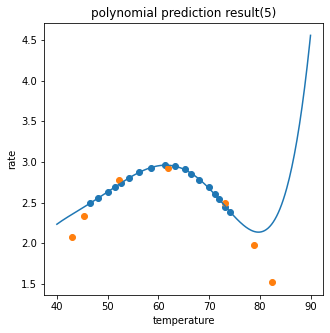

In [27]:
fig4 = plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.plot(X_range, y_5_range_predict)
plt.title('polynomial prediction result(5)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()